# Задача 1 вариант 5

Так как $k$ известно, надо оценить только параметр $\theta$. Воспользуемся методом моментов (правда тут только матожидание):
$EX = k\theta$ (так как это гамма распределение с параметрами $k$, $\theta$ - $\Gamma(k, \theta)$)

Сразу все напишем согласно инструкции: `ns` - размеры выборок, `m` - количество итераций взятия выборки (фактически, размер выборки для выборочных характеристик)

Для каждой выборки найдем: $bias(\widehat\theta) = E(\widehat\theta - \theta)$, выборочную дисперсию $Var\widehat\theta$ и количество неуспешных испытаний из m и посмотрим на графики

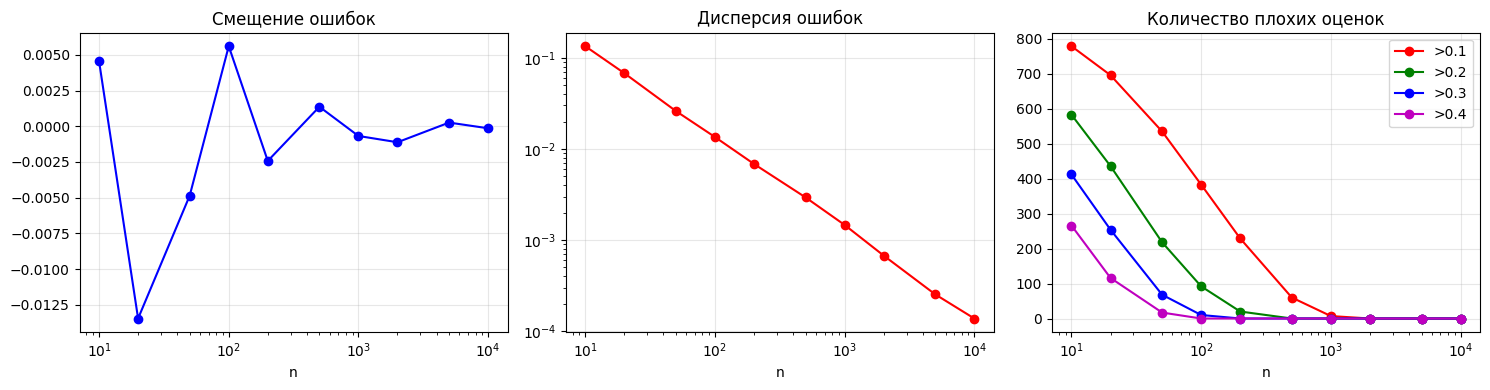

In [2]:
import numpy as np

ns = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
m = 1000
k = 3
real_theta = 2

theta_errors_means = []
theta_errors_vars = []
bad_sample_counts_01 = []
bad_sample_counts_02 = []
bad_sample_counts_03 = []
bad_sample_counts_04 = []

for n in ns:
    sample_thetas = []

    for _ in range(m):
        samples = np.random.gamma(shape=k, scale=real_theta, size=n)
        sample_mean = np.mean(samples)
        sample_theta = sample_mean / k
        sample_thetas.append(sample_theta)

    sample_thetas = np.array(sample_thetas)
    theta_errors = sample_thetas - real_theta
    theta_errors_means.append(np.mean(theta_errors))
    theta_errors_vars.append(np.var(theta_errors))
    bad_sample_counts_01.append(np.sum(np.abs(theta_errors) > 0.1))
    bad_sample_counts_02.append(np.sum(np.abs(theta_errors) > 0.2))
    bad_sample_counts_03.append(np.sum(np.abs(theta_errors) > 0.3))
    bad_sample_counts_04.append(np.sum(np.abs(theta_errors) > 0.4))

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# Смещение ошибок
plt.subplot(1, 3, 1)
plt.plot(ns, theta_errors_means, 'bo-')
plt.xscale('log')
plt.xlabel('n')
plt.title('Смещение ошибок')
plt.grid(True, alpha=0.3)

# Дисперсия ошибок
plt.subplot(1, 3, 2)
plt.plot(ns, theta_errors_vars, 'ro-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.title('Дисперсия ошибок')
plt.grid(True, alpha=0.3)

# Количество плохих оценок для разных порогов
plt.subplot(1, 3, 3)
plt.plot(ns, bad_sample_counts_01, 'ro-', label='>0.1')
plt.plot(ns, bad_sample_counts_02, 'go-', label='>0.2')
plt.plot(ns, bad_sample_counts_03, 'bo-', label='>0.3')
plt.plot(ns, bad_sample_counts_04, 'mo-', label='>0.4')
plt.xscale('log')
plt.xlabel('n')
plt.title('Количество плохих оценок')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Рассмотрим также дополнительно гргафик зависимости количества ошибок от порога:

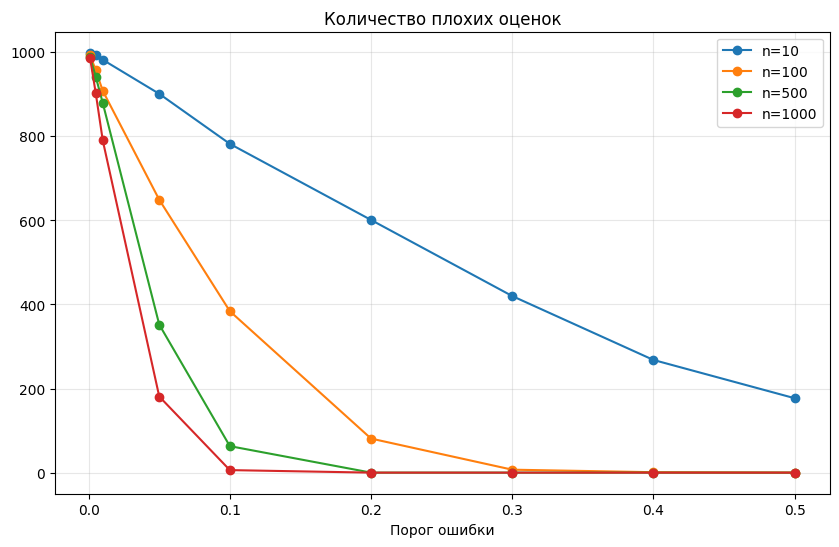

In [3]:
thresholds = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
selected_ns = [10, 100, 500, 1000]

plt.figure(figsize=(10, 6))

for n in selected_ns:
    idx = ns.index(n)
    sample_thetas = []
    
    for _ in range(m):
        samples = np.random.gamma(shape=k, scale=real_theta, size=n)
        sample_mean = np.mean(samples)
        sample_theta = sample_mean / k
        sample_thetas.append(sample_theta)
    
    sample_thetas = np.array(sample_thetas)
    theta_errors = sample_thetas - real_theta
    
    bad_counts = []
    for threshold in thresholds:
        bad_counts.append(np.sum(np.abs(theta_errors) > threshold))
    
    plt.plot(thresholds, bad_counts, 'o-', label=f'n={n}')

plt.xlabel('Порог ошибки')
plt.title('Количество плохих оценок')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Выводы

1. При увеличении размера выборки, улучшаются результаты оценки (уменьшается ошибка)
2. Я по ошибке сначала сделал задачу для распределения Лапласа, и заметил, что график смещения ошибок (для квадрата) у нее в большей степени меньше 0 (при повторных перегенерациях графиков в том числе) - из-за возведения в квадрат
3. Дисперсия от выборки похожа на гиперболу. С учетом логарифмической шкалы: $\ln(Var) \approx a - \ln(n) \Rightarrow Var \approx e^{\ln(\frac{e^a}{n})} = \frac{c}{n}$
4. Про error_count(threshold) ничего сказать не могу, кроме того что график убывающий